In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_excel("Copy of Mine_Dataset.xls")
df

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
...,...,...,...,...
333,0.323262,0.909091,0.4,5
334,0.444108,0.181818,1.0,5
335,0.353474,0.454545,1.0,5
336,0.362537,0.727273,1.0,5


In [7]:
# Separate the features (inputs) and target (output) variable
X = df.drop("M", axis=1)
y = df["M"]

# Encode the categorical variable "Soil Type (S)" using LabelEncoder
le = LabelEncoder()
X["S"] = le.fit_transform(X["S"])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

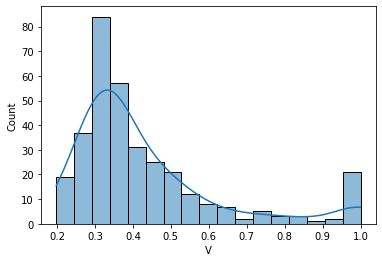

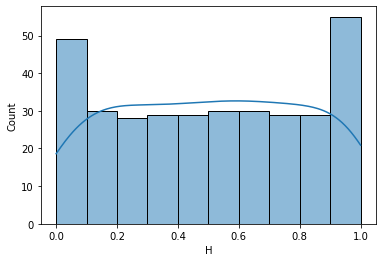

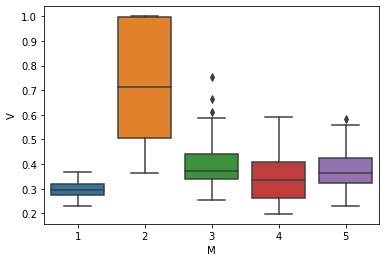

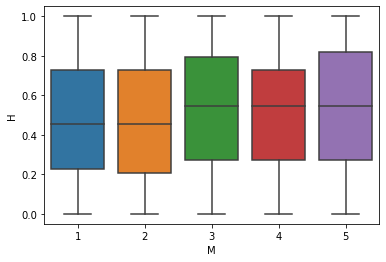

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['V'], kde=True)
plt.show()

sns.histplot(df['H'], kde=True)
plt.show()

sns.boxplot(x='M', y='V', data=df)
plt.show()

sns.boxplot(x='M', y='H', data=df)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_cm = confusion_matrix(y_test, y_pred)

print("Random Forest Classifier accuracy score: ", rfc_accuracy)
print("Confusion matrix: \n", rfc_cm)

Random Forest Classifier accuracy score:  0.5294117647058824
Confusion matrix: 
 [[17  0  0  0  4]
 [ 0 18  0  2  0]
 [ 2  2  6  2  6]
 [ 1  3  3  8  6]
 [ 4  1  7  5  5]]


In [18]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred)
svm_cm = confusion_matrix(y_test, y_pred)

print("Support Vector Machine Classifier accuracy score: ", svm_accuracy)
print("Confusion matrix: \n", svm_cm)

Support Vector Machine Classifier accuracy score:  0.3627450980392157
Confusion matrix: 
 [[13  1  3  3  1]
 [ 0 14  3  2  1]
 [ 4  2  7  1  4]
 [ 7  3  6  2  3]
 [ 7  0 10  4  1]]


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_cm = confusion_matrix(y_test, y_pred)

print("K-Nearest Neighbors Classifier accuracy score: ", knn_accuracy)
print("Confusion matrix: \n", knn_cm)

K-Nearest Neighbors Classifier accuracy score:  0.3627450980392157
Confusion matrix: 
 [[13  1  3  3  1]
 [ 0 14  3  2  1]
 [ 4  2  7  1  4]
 [ 7  3  6  2  3]
 [ 7  0 10  4  1]]


In [20]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Perform cross-validation on the training set
cv_results = cross_val_score(rf_clf, X_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation results
print("Cross-validation results (Random Forest):")
print(cv_results)
print("Mean accuracy: {:.3f}".format(cv_results.mean()))

# Fit the Random Forest classifier on the training set
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Calculate accuracy score and confusion matrix on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy score (Random Forest): {:.3f}".format(accuracy))
print("Confusion matrix (Random Forest):")
print(conf_mat)

Cross-validation results (Random Forest):
[0.41666667 0.54166667 0.66666667 0.5        0.45833333 0.5
 0.52173913 0.47826087 0.52173913 0.52173913]
Mean accuracy: 0.513
Accuracy score (Random Forest): 0.480
Confusion matrix (Random Forest):
[[17  0  0  0  4]
 [ 0 18  0  2  0]
 [ 2  2  5  3  6]
 [ 2  3  3  6  7]
 [ 4  1  9  5  3]]


In [22]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear_scores = cross_val_score(svm_linear, X_train, y_train, cv=kf)
print("SVM with Linear Kernel:")
print("Average accuracy score: ", svm_linear_scores.mean())

# SVM with rbf kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf_scores = cross_val_score(svm_rbf, X_train, y_train, cv=kf)
print("\nSVM with RBF Kernel:")
print("Average accuracy score: ", svm_rbf_scores.mean())

# SVM with poly kernel
svm_poly = SVC(kernel='poly', C=1, degree=3)
svm_poly_scores = cross_val_score(svm_poly, X_train, y_train, cv=kf)
print("\nSVM with Polynomial Kernel:")
print("Average accuracy score: ", svm_poly_scores.mean())

SVM with Linear Kernel:
Average accuracy score:  0.28442028985507245

SVM with RBF Kernel:
Average accuracy score:  0.2590579710144928

SVM with Polynomial Kernel:
Average accuracy score:  0.3478260869565217


In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 20)}

# Create the KNN classifier
knn_clf = KNeighborsClassifier()

# Perform cross-validation with GridSearchCV
knn_cv = GridSearchCV(knn_clf, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Print the best parameters and accuracy score
print("Best Parameters:", knn_cv.best_params_)
print("Cross-validation Accuracy Score:", knn_cv.best_score_)

Best Parameters: {'n_neighbors': 3}
Cross-validation Accuracy Score: 0.3648936170212766
